In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '../ubuntu-24.04.4-desktop-amd64.iso.csv'
df = pd.read_csv(file_path)

In [3]:

df['Total(MB)'] = df['TotalBytes'] / (1024 * 1024)
df['Speed(MB/s)'] = df['Speed(B/s)'] / (1024 * 1024)

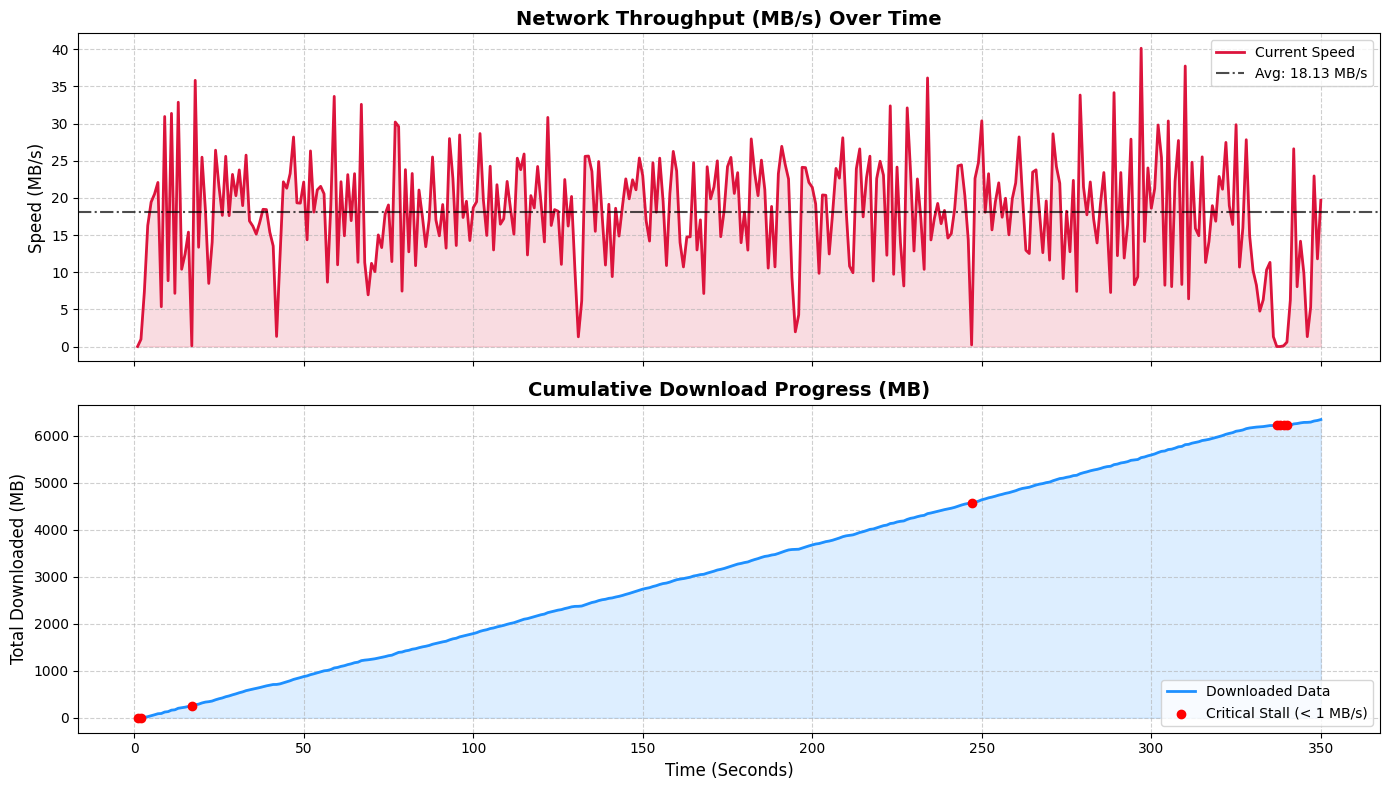

In [ ]:
# Vibe Coded Masterpiece
# 3. Set up a high-quality visualization layout (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- PLOT 1: THE SPEED (The Sawtooth & The Stall) ---
ax1.plot(df['Timestamp(s)'], df['Speed(MB/s)'], color='crimson', linewidth=2, label='Current Speed')
ax1.set_title('Network Throughput (MB/s) Over Time', fontsize=14, fontweight='bold')
ax1.set_ylabel('Speed (MB/s)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.fill_between(df['Timestamp(s)'], df['Speed(MB/s)'], color='crimson', alpha=0.15)
ax1.legend(loc='upper right')

# Calculate and plot the average speed line
avg_speed = df['Speed(MB/s)'].mean()
ax1.axhline(y=avg_speed, color='black', linestyle='-.', alpha=0.7, label=f'Avg: {avg_speed:.2f} MB/s')
ax1.legend(loc='upper right')

# --- PLOT 2: THE PROGRESS (The Curve) ---
ax2.plot(df['Timestamp(s)'], df['Total(MB)'], color='dodgerblue', linewidth=2, label='Downloaded Data')
ax2.set_title('Cumulative Download Progress (MB)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time (Seconds)', fontsize=12)
ax2.set_ylabel('Total Downloaded (MB)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.fill_between(df['Timestamp(s)'], df['Total(MB)'], color='dodgerblue', alpha=0.15)

# Highlight the "Stall" zone if speed drops below 1 MB/s
stall_mask = df['Speed(MB/s)'] < 1.0
ax2.scatter(df['Timestamp(s)'][stall_mask], df['Total(MB)'][stall_mask],
            color='red', zorder=5, label='Critical Stall (< 1 MB/s)')
ax2.legend(loc='lower right')

# 4. Render
plt.tight_layout()
plt.show()